# Introducción

El objetivo de este proyecto es desarrollar un clasificador de imágenes capaz de distinguir entre dos razas de gatos, concretamente las razas Ragdoll y Russian Blue, para ello se emplearán imágenes de especímenes de dichas razas provenientes del conjunto de datos Oxford-IIIT Pet Dataset.

La estructura del notebook estará dividida en 3 secciones:
* En primer lugar, se realizará un proceso de ingesta de los datos de entrada con el propósito de hacer que las imágenes se encuentren disponibles en el entorno de ejecución del notebook.
* A continuación, se llevará a cabo una etapa de preprocesamiento y extracción de características en la cual se aplicarán transformaciones a los datos y se obtendrán las características de mayor poder informativo de las imágenes.
* Por último, se entrenarán distintos modelos de inteligencia artificial a partir de los datos obtenidos en la fase anterior y para cada modelo se evaluará, en base a un mismo conjunto de métricas, su capacidad de predicción frente a nuevas muestras de datos.

# Ingesta

El primer paso en el desarrollo del presente notebook es la ingesta de los datos requeridos para entrenar y evaluar el clasificador.

Inicialmente se ha descargado el conjunto de datos Oxford-IIIT Pet Dataset, se ha creado una carpeta llamada 'images', dentro de la cual se han creado las subcarpetas 'ragdoll' y 'russianblue' para contener todas las imágenes de las respectivas razas que se encontraban en el conjunto descargado y finalmente se ha subido a un repositorio de google drive la carpeta 'images' para hacerla accesible de manera online.

Con el objetivo de acceder a los datos de la carpeta 'images' desde el notebook, se ha montado el contenido de mi cuenta de google drive en el entorno de ejecución del proyecto.

Una vez que las imágenes son accesibles, se han creado las carpetas 'train' y 'test' dentro de la carpeta 'images', en las cuales mediante la técnica train test split se ha copiado de manera aleatoria un 80% de las imágenes en 'train' y el 20% restante en 'test', de este modo se tendrá una muestra de datos de gran tamaño con la que entrenar el clasificador y una muestra de menor tamaño para evaluarlo con datos desconocidos. Además, se realizarán las correspondientes comprobaciones para verificar que la distribución ha sido realizada correctamente.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Definir la ruta local donde se encuentran las imágenes
images_path = "/content/drive/MyDrive/Colab Notebooks/Asignatura7/Practica/images"

# Crear directorios para entrenamiento y prueba, asegurándose de que estén vacíos
for subset in ['train', 'test']:
    for breed in ['Ragdoll', 'Russian_Blue']:
        dir_path = os.path.join(images_path, subset, breed)
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
        os.makedirs(dir_path, exist_ok=True)

# Definir rutas a las imágenes de ragdoll y russian blue
ragdoll_path = os.path.join(images_path, "ragdoll")
russianblue_path = os.path.join(images_path, "russianblue")

# Obtener listas de archivos
ragdoll_images = [os.path.join(ragdoll_path, img) for img in os.listdir(ragdoll_path) if img.endswith('.jpg')]
russianblue_images = [os.path.join(russianblue_path, img) for img in os.listdir(russianblue_path) if img.endswith('.jpg')]

# Mostrar el número de imágenes en las carpetas originales
print(f"Número de imágenes en 'ragdoll': {len(ragdoll_images)}")
print(f"Número de imágenes en 'russianblue': {len(russianblue_images)}")

# Dividir en conjuntos de entrenamiento y prueba
train_ragdoll, test_ragdoll = train_test_split(ragdoll_images, test_size=0.2, random_state=42)
train_russianblue, test_russianblue = train_test_split(russianblue_images, test_size=0.2, random_state=42)

# Función para mover imágenes a los directorios correspondientes
def move_images(image_list, subset, breed):
    for img_path in image_list:
        basename = os.path.basename(img_path)
        newpath = os.path.join(images_path, subset, breed, basename)
        shutil.move(img_path, newpath)

# Mover las imágenes a los directorios de entrenamiento y prueba
move_images(train_ragdoll, "train", "Ragdoll")
move_images(test_ragdoll, "test", "Ragdoll")
move_images(train_russianblue, "train", "Russian_Blue")
move_images(test_russianblue, "test", "Russian_Blue")

# Contar el número de imágenes en las carpetas de entrenamiento y prueba
train_ragdoll_count = len(os.listdir(os.path.join(images_path, "train", "Ragdoll")))
test_ragdoll_count = len(os.listdir(os.path.join(images_path, "test", "Ragdoll")))
train_russianblue_count = len(os.listdir(os.path.join(images_path, "train", "Russian_Blue")))
test_russianblue_count = len(os.listdir(os.path.join(images_path, "test", "Russian_Blue")))

# Verificar que los números coincidan
ragdoll_total = train_ragdoll_count + test_ragdoll_count
russianblue_total = train_russianblue_count + test_russianblue_count

print(f"Número de imágenes en 'train/ragdoll': {train_ragdoll_count}")
print(f"Número de imágenes en 'test/ragdoll': {test_ragdoll_count}")
print(f"Número total en 'train' y 'test' de 'ragdoll': {ragdoll_total} (debe ser {len(ragdoll_images)})")

print(f"Número de imágenes en 'train/russianblue': {train_russianblue_count}")
print(f"Número de imágenes en 'test/russianblue': {test_russianblue_count}")
print(f"Número total en 'train' y 'test' de 'russianblue': {russianblue_total} (debe ser {len(russianblue_images)})")

# Validar los números
assert ragdoll_total == len(ragdoll_images), "El número de imágenes de 'ragdoll' no coincide"
assert russianblue_total == len(russianblue_images), "El número de imágenes de 'russianblue' no coincide"

print("Verificación completada con éxito.")
print("Proceso de ingesta completado.")

Número de imágenes en 'ragdoll': 200
Número de imágenes en 'russianblue': 200
Número de imágenes en 'train/ragdoll': 160
Número de imágenes en 'test/ragdoll': 40
Número total en 'train' y 'test' de 'ragdoll': 200 (debe ser 200)
Número de imágenes en 'train/russianblue': 160
Número de imágenes en 'test/russianblue': 40
Número total en 'train' y 'test' de 'russianblue': 200 (debe ser 200)
Verificación completada con éxito.
Proceso de ingesta completado.


# Preprocesamiento y Extracción de características

El preprocesamiento y la extracción de características de los datos de entrada son pasos imprescindibles en la creación de modelos de inteligencia artificial, se componen de una serie de transformaciones y ajustes que buscan garantizar la calidad en los datos para su posterior manipulación por algoritmos de aprendizaje automático.

Con este propósito se llevarán a cabo los siguientes procesos:

* Redimensionamiento: las imágenes pueden tener diferentes tamaños y resoluciones, por ello se redimensionarán todas a un tamaño fijo (en este caso, 128x128 píxeles), lo cual facilita el procesamiento y asegura que el modelo reciba datos con una estructura uniforme, mediante este paso el modelo puede alcanzar un mejor rendimiento y capacidad de generalización.

* Conversión a Escala de Grises: convertir las imágenes a escala de grises reduce la complejidad, ya que las imágenes en color tienen una mayor cantidad de información (tres canales: RGB), para ciertos métodos de extracción de características trabajar con imágenes en escala de grises resulta más eficiente al reducir información innecesaria.

* Histogram of Oriented Gradients (HOG): se trata de una técnica que captura la estructura y el contorno de los objetos en una imagen mediante la distribución de gradientes en la intensidad. Las imágenes en su forma bruta pueden tener un gran tamaño, lo cual puede ser computacionalmente complejo de abordar, la extracción de características reduce la dimensionalidad para que los algoritmos puedan trabajar de un modo más eficiente con la información y permite obtener representaciones más significativas de las imágenes para mejorar la precisión del clasificador.

In [ ]:
import numpy as np
import cv2
from skimage.feature import hog

# Función para redimensionar y extraer características HOG
def extract_hog_features(images):
    hog_features = []
    for image_path in images:
        image = cv2.imread(image_path)
        image_resized = cv2.resize(image, (128, 128))  # Redimensionar imagen a tamaño fijo (128x128)
        image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        features = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

# Extraer características HOG para conjunto de entrenamiento y prueba
train_ragdoll_features = extract_hog_features(train_ragdoll)
test_ragdoll_features = extract_hog_features(test_ragdoll)
train_russianblue_features = extract_hog_features(train_russianblue)
test_russianblue_features = extract_hog_features(test_russianblue)

# Concatenar características y etiquetas
X_train = np.concatenate((train_ragdoll_features, train_russianblue_features))
X_test = np.concatenate((test_ragdoll_features, test_russianblue_features))

y_train = np.concatenate((np.zeros(len(train_ragdoll_features)), np.ones(len(train_russianblue_features))))
y_test = np.concatenate((np.zeros(len(test_ragdoll_features)), np.ones(len(test_russianblue_features))))

print("Preprocesamiento y extracción de características HOG completados.")

Preprocesamiento y extracción de características HOG completados.


# Entrenamiento y Evaluación

El entrenamiento de un modelo de IA es el proceso mediante el cual el modelo aprende a realizar predicciones o tomar decisiones basadas en datos de entrada, para ello el modelo se ajusta a la estrctura y contenido del conjunto de datos de entrada y a las salidas conocidas (etiquetas), utilizando algoritmos de aprendizaje. El objetivo es minimizar el error entre las predicciones del modelo y los valores reales, ajustando los parámetros internos del modelo.

La validación es el proceso de evaluar el rendimiento del modelo entrenado utilizando un conjunto de datos diferente al conjunto de entrenamiento, ayuda a verificar si el modelo generaliza bien a datos nuevos y no solo a los datos con los que fue entrenado. La validación se utiliza para ajustar hiperparámetros y evitar problemas como el sobreajuste (overfitting).

Como se mencionó en el punto de ingesta, se han dividido aleatoriamente las muestras de datos entre un conjunto de entrenamiento (train) y otro de validación (test), cada uno de estos se utilizará en su etapa correspondiente.

En este apartado se realizará el entrenamiento y evaluación de diversos modelos de inteligencia artificial, para este propósito se emplearán algoritmos pertenecientes a distintas ramas del aprendizaje automático. El objetivo es obtener una comparación del rendimiento de todas las técnicas siendo evaluadas por las mismas métricas.

La evaluación del rendimiento del modelo se realizará utilizando varias métricas con el objetivo de proporcionar una visión completa del desempeño de cada clasificador, las métricas que se emplearán son las siguientes:
* Accuracy: la exactitud es la proporción de predicciones correctas entre el total de predicciones realizadas. Es una métrica global que indica el porcentaje de predicciones que el modelo ha clasificado correctamente.

* Classification Report: el informe de clasificación incluye varias métricas de evaluación importantes para cada clase:

 * Precision: la precisión se refiere a la proporción de predicciones positivas correctas entre todas las predicciones positivas.

 * Recall: la sensibilidad se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias positivas reales.

 * F1-Score: la puntuación F1 es la media entre la precisión y la exhaustividad.

* Confusion Matrix: la matriz de confusión es una herramienta que proporciona una representación visual del rendimiento del modelo, mostrando el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.


## Algoritmos tradicionales

Los algoritmos tradicionales de machine learning son métodos estadísticos y computacionales utilizados para identificar patrones en los datos y hacer predicciones basadas en estos. A diferencia de las técnicas más avanzadas como las redes neuronales profundas, estos algoritmos suelen ser más sencillos de implementar y entender, y son adecuados para realizar un primer análisis del rendimiento de modelos en base a los datos de entrada por su simplicidad, eficiencia y velocidad.

Respecto a los algoritmos de aprendizaje supervisado que se compararán, dado que se trata de un problema de clasificación, se han elegido los siguientes algoritmos:
* Decision Tree: construye un árbol de decisiones a partir de los datos de entrenamiento, cada nodo del árbol representa una característica, cada rama una decisión basada en esa característica, y cada hoja una etiqueta de clasificación.
* KNN (K-Nearest Neighbors): asigna una etiqueta a un punto de datos basándose en la mayoría de las etiquetas de sus k vecinos más cercanos, se adapta bien a conjuntos de datos cuando la localidad en la distribución de datos es importante.
* SVC (Support Vector Classifier): encuentra el hiperplano óptimo que maximiza el margen entre las clases en el espacio de características, es robusto frente a conjuntos de datos con alta dimensionalidad y es eficaz incluso en conjuntos de datos con un número pequeño de muestras.
* Logistic Regression: modela la probabilidad de una variable binaria en función de una o más variables independientes.
* Random Forest: crea un conjunto de árboles de decisión entrenados sobre diferentes subconjuntos del conjunto de datos y utiliza la media de las predicciones individuales para mejorar la precisión predictiva y controlar el sobreajuste.

Los hiperparámetros son configuraciones del modelo que deben ser establecidas antes del entrenamiento y tienen un impacto esencial en su rendimiento, el proceso de encontrar la mejor combinación de hiperparámetros se llama tuning o ajuste de hiperparámetros. Para cada uno de los algoritmos se utilizará la técnica GridSearchCV que permite obtener sus mejores hiperparámetros para el conjunto de datos con el que se está trabajando, a continuación se da una explicación de los hiperparámetros que se utilizarán para cada algoritmo:

* DecisionTree:
 * criterion: gini y entropy son los criterios para medir la calidad de una división. Gini mide la impureza y Entropy mide la desorganización de la información.
 * max_depth: controla la profundidad máxima del árbol para evitar el sobreajuste. None permite que el árbol crezca sin limitaciones, mientras que valores como 10, 20, y 30 limitan su crecimiento.
* KNeighbors:
 * n_neighbors: número de vecinos a considerar en la clasificación. Probar con 3, 5 y 7 ayuda a encontrar el balance entre considerar pocos o muchos vecinos.
 * weights: uniform da el mismo peso a todos los vecinos, mientras que distance da más peso a los vecinos más cercanos.
* SVC:
 * C: parámetro de regularización. Un C bajo puede provocar un ajuste insuficiente, mientras que un C alto puede causar sobreajuste.
 * kernel:
  * linear: utiliza un kernel lineal para transformaciones lineales.
  * rbf: utiliza un kernel radial para transformaciones no lineales.
  * gamma (para SVM con kernel RBF): scale y auto son los parámetros que determinan cómo se calcula el coeficiente gamma.
* Logistic Regression:
 * C: parámetro de regularización. Valores de 0.1, 1, y 10 se prueban para encontrar el mejor balance entre ajuste insuficiente y sobreajuste.
 * solver: liblinear y lbfgs son los algoritmos de optimización utilizados para encontrar los mejores parámetros del modelo.
* Random Forest:
 * n_estimators: número de árboles en el bosque. Valores de 50, 100, y 200 se prueban para determinar el mejor número de estimadores.
 * max_depth: profundidad máxima de los árboles para evitar el sobreajuste. None, 10, y 20 son los valores considerados.
 * min_samples_split: número mínimo de muestras requeridas para dividir un nodo. Valores de 2, 5, y 10 se prueban para encontrar el mejor valor.

Entrenando y evaluando DecisionTree...
Mejores Hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': None}
              precision    recall  f1-score   support

     Ragdoll       0.55      0.57      0.56        40
Russian Blue       0.55      0.53      0.54        40

    accuracy                           0.55        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.55      0.55      0.55        80

Accuracy: 0.55


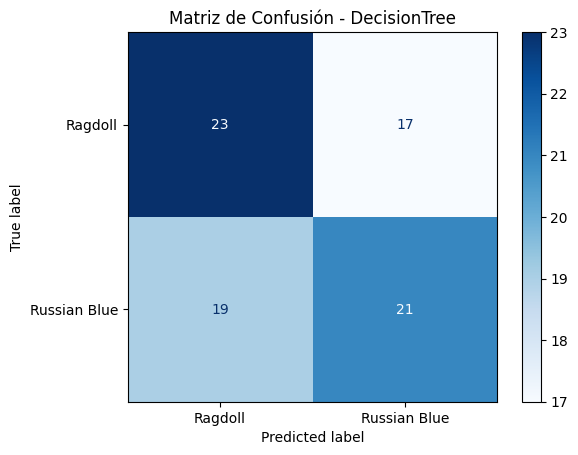


Entrenando y evaluando KNeighbors...
Mejores Hiperparámetros encontrados: {'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

     Ragdoll       0.30      0.07      0.12        40
Russian Blue       0.47      0.82      0.60        40

    accuracy                           0.45        80
   macro avg       0.39      0.45      0.36        80
weighted avg       0.39      0.45      0.36        80

Accuracy: 0.45


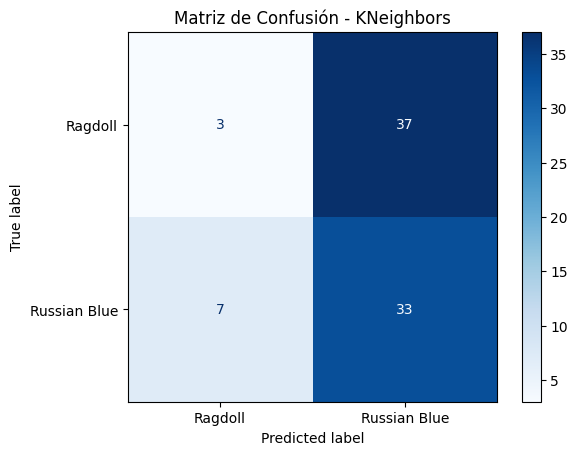


Entrenando y evaluando SVM Linear...
Mejores Hiperparámetros encontrados: {'C': 0.1}
              precision    recall  f1-score   support

     Ragdoll       0.62      0.82      0.71        40
Russian Blue       0.74      0.50      0.60        40

    accuracy                           0.66        80
   macro avg       0.68      0.66      0.65        80
weighted avg       0.68      0.66      0.65        80

Accuracy: 0.66


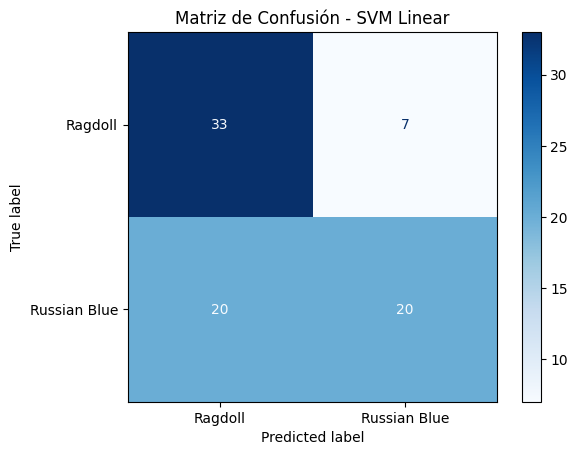


Entrenando y evaluando SVM RBF...
Mejores Hiperparámetros encontrados: {'C': 1, 'gamma': 'scale'}
              precision    recall  f1-score   support

     Ragdoll       0.72      0.70      0.71        40
Russian Blue       0.71      0.72      0.72        40

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80

Accuracy: 0.71


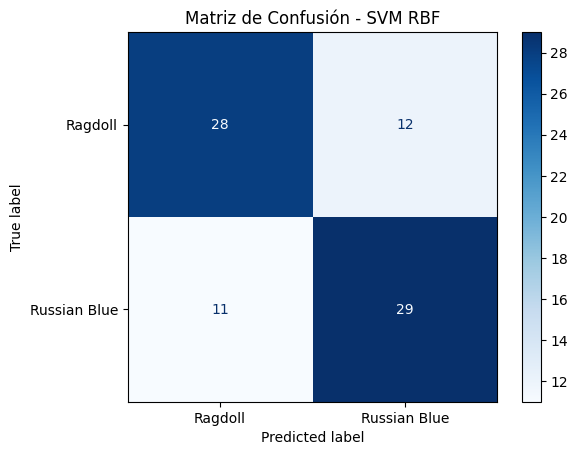


Entrenando y evaluando Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejores Hiperparámetros encontrados: {'C': 10, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

     Ragdoll       0.67      0.70      0.68        40
Russian Blue       0.68      0.65      0.67        40

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.67        80

Accuracy: 0.68


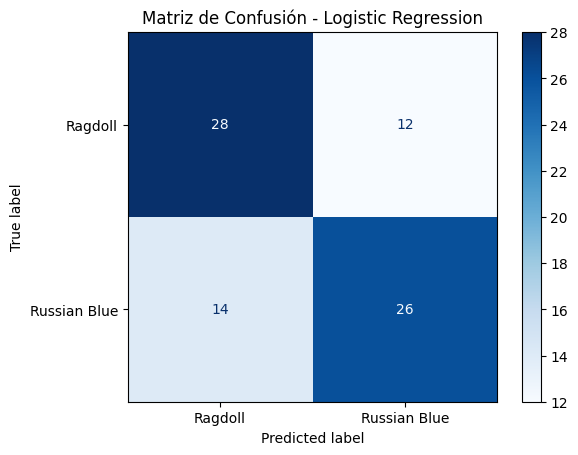


Entrenando y evaluando Random Forest...
Mejores Hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

     Ragdoll       0.61      0.68      0.64        40
Russian Blue       0.64      0.57      0.61        40

    accuracy                           0.62        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.62      0.62        80

Accuracy: 0.62


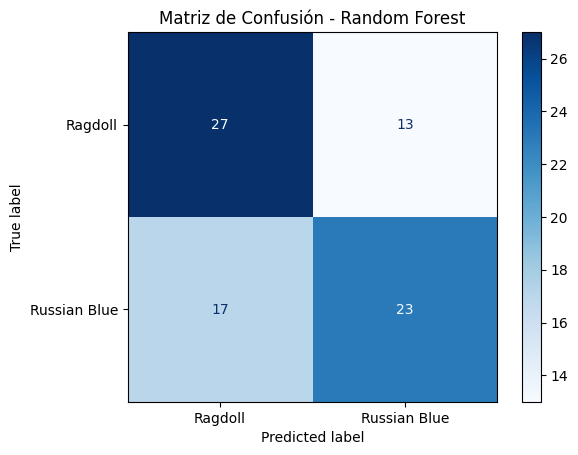


Entrenamiento y validación de modelos completados.


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Definir los clasificadores y sus nombres
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

# Definir los hiperparámetros para cada clasificador
param_grids = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30]
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVM Linear': {
        'C': [0.1, 1, 10]
    },
    'SVM RBF': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Entrenamiento y evaluación de cada clasificador con búsqueda de hiperparámetros
for name, model in classifiers.items():
    print(f"Entrenando y evaluando {name}...")

    # Configurar GridSearchCV con el modelo y los hiperparámetros específicos
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)

    # Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo encontrado
    best_model = grid_search.best_estimator_

    # Predecir en el conjunto de prueba con el mejor modelo
    y_pred = best_model.predict(X_test)

    # Evaluar el modelo
    print(f"Mejores Hiperparámetros encontrados: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred, target_names=['Ragdoll', 'Russian Blue']))
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ragdoll', 'Russian Blue'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

    print()

print("Entrenamiento y validación de modelos completados.")

## Bagging con Árboles de Decisión

Bagging Classifier con Árbol de Decisión: Bagging es un método de aprendizaje conjunto que mejora la estabilidad del modelo mediante la combinación de predicciones de múltiples modelos base entrenados en diferentes subconjuntos del conjunto de datos. En este caso, el clasificador base es un Árbol de Decisión, cada Árbol de Decisión es entrenado en un subconjunto diferente del conjunto de datos original y las predicciones finales se obtienen mediante votación mayoritaria de los árboles individuales.

Para el Bagging Classifier se empleará también la técnica GridSearchCV para obtener sus mejores hiperparámetros, a continuación se da una explicación de los hiperparámetros que se utilizarán:
* n_estimators: número de estimadores (árboles) en el conjunto. Valores de 50, 100, y 200 se prueban para determinar el mejor número de árboles.
* max_samples: proporción de muestras a utilizar para entrenar cada estimador. Valores de 0.5, 0.7, y 1.0 se prueban para encontrar la mejor proporción.
* max_features: proporción de características a utilizar para entrenar cada estimador. Valores de 0.5, 0.7, y 1.0 se prueban para determinar la mejor proporción de características.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores Hiperparámetros encontrados: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 100}
              precision    recall  f1-score   support

     Ragdoll       0.69      0.82      0.75        40
Russian Blue       0.78      0.62      0.69        40

    accuracy                           0.73        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80

Accuracy: 0.72


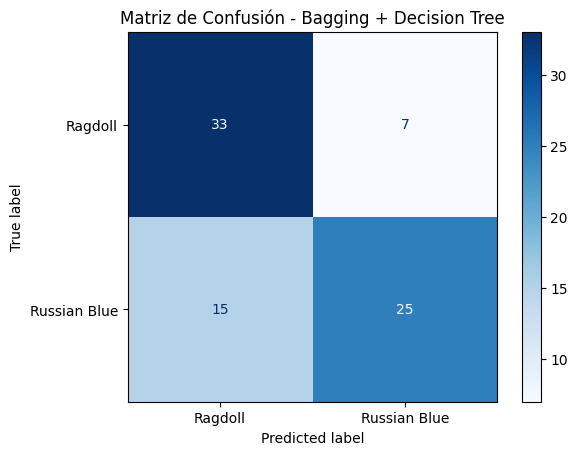

Entrenamiento y validación del modelo completados.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir el clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier()

# Definir el clasificador Bagging
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, random_state=42)

# Definir los hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],   # Número de estimadores (árboles)
    'max_samples': [0.5, 0.7, 1.0],   # Proporción de muestras a utilizar para entrenar cada estimador
    'max_features': [0.5, 0.7, 1.0]    # Proporción de características a utilizar para entrenar cada estimador
}

# Configurar GridSearchCV con el clasificador Bagging y los hiperparámetros específicos
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print(f"Mejores Hiperparámetros encontrados: {grid_search.best_params_}")
print(classification_report(y_test, y_pred, target_names=['Ragdoll', 'Russian Blue']))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ragdoll', 'Russian Blue'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Bagging + Decision Tree")
plt.show()

print("Entrenamiento y validación del modelo completados.")

## Gradient Boosting con XGBoost

XGBoost (Extreme Gradient Boosting) es un método de aprendizaje supervisado que utiliza un enfoque de boosting para mejorar la robustez del modelo mediante la combinación de predicciones de múltiples árboles de decisión entrenados secuencialmente. Cada árbol intenta corregir los errores cometidos por los árboles anteriores, lo que permite que el modelo final tenga una mayor capacidad de generalización.

Del mismo modo que en los casos anteriores, para XGBoost Classifier se utilizará la técnica GridSearchCV para obtener sus mejores hiperparámetros. A continuación, se da una explicación de los hiperparámetros que se utilizarán:
* n_estimators: número de árboles (estimadores) en el conjunto. Valores de 50, 100, y 200 se prueban para determinar el mejor número de árboles.
* max_depth: profundidad máxima de cada árbol. Valores de 3, 5, y 7 se prueban para encontrar el equilibrio entre la complejidad del modelo y el sobreajuste.
* learning_rate: tasa de aprendizaje, que determina el peso de cada árbol en la combinación final. Valores de 0.01, 0.1, y 0.3 se prueban para encontrar el mejor balance entre la rapidez de aprendizaje y la precisión del modelo.


Mejores Hiperparámetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

     Ragdoll       0.78      0.80      0.79        40
Russian Blue       0.79      0.78      0.78        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80

Accuracy: 0.79


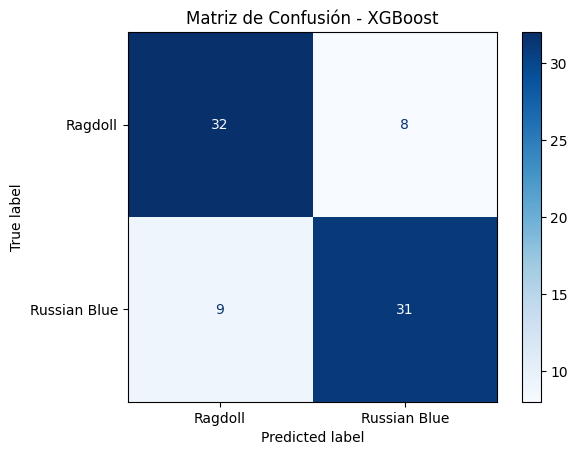

Entrenamiento y validación del modelo completados.


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir el clasificador XGBoost
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Definir los hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],      # Número de árboles (estimadores)
    'max_depth': [3, 5, 7],               # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.3]     # Tasa de aprendizaje
}

# Configurar GridSearchCV con el clasificador XGBoost y los hiperparámetros específicos
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print(f"Mejores Hiperparámetros encontrados: {grid_search.best_params_}")
print(classification_report(y_test, y_pred, target_names=['Ragdoll', 'Russian Blue']))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ragdoll', 'Russian Blue'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - XGBoost")
plt.show()

print("Entrenamiento y validación del modelo completados.")

## Red neuronal

Las redes neuronales son un método de aprendizaje supervisado inspirado en el funcionamiento del cerebro humano, utilizan capas de neuronas que transforman la entrada a través de funciones de activación para modelar complejas relaciones no lineales en los datos.

Se utilizará la biblioteca Keras para construir y entrenar una red neuronal mediante los siguientes pasos:
* Escalado de características: normalizar los datos para que las características tengan una media de 0 y una desviación estándar de 1.
* One-hot encoding: convertir las etiquetas de las clases en un formato categórico.
* Definición de la red neuronal: crear un modelo secuencial con varias capas densamente conectadas (fully connected), utilizando funciones de activación 'relu' para las capas ocultas y 'softmax' para la capa de salida que mide la probabilida de pertenencia a las distintas clases.
* Compilación del modelo: configurar el modelo con el optimizador Adam, la función de pérdida categorical_crossentropy y la métrica de precisión.
* Entrenamiento del modelo: entrenar la red neuronal con los datos de entrenamiento durante varias épocas, con un subconjunto de los datos reservado para validación.

Epoch 1/50
8/8 [==============================] - 2s 64ms/step - loss: 0.8821 - accuracy: 0.5898 - val_loss: 0.9179 - val_accuracy: 0.3125
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.8478 - accuracy: 0.5664 - val_loss: 0.7891 - val_accuracy: 0.4844
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7701 - accuracy: 0.6055 - val_loss: 0.7851 - val_accuracy: 0.4375
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6999 - accuracy: 0.6016 - val_loss: 0.7307 - val_accuracy: 0.5156
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.5847 - accuracy: 0.6836 - val_loss: 0.7238 - val_accuracy: 0.5469
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6626 - accuracy: 0.6094 - val_loss: 0.7749 - val_accuracy: 0.4062
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6122 - accuracy: 0.6523 - val_loss: 0.8059 - val_accuracy: 0.2969
Epoch 8/50
8/8 [===========

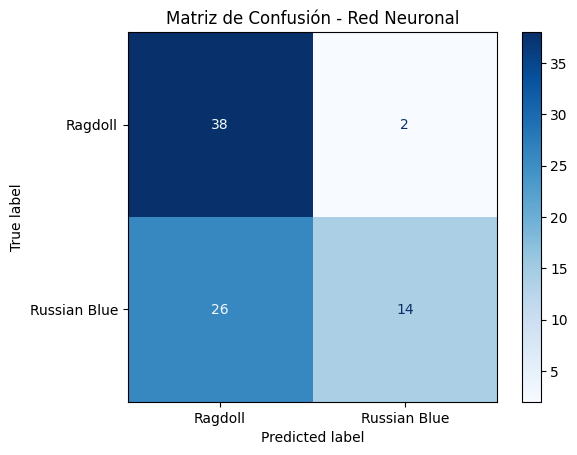

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir etiquetas a formato categórico (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Definir la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred_categorical = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_categorical, axis=1)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['Ragdoll', 'Russian Blue']))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ragdoll', 'Russian Blue'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Red Neuronal")
plt.show()

## Transfer Learning con CNN preentrenadas

Las redes neuronales convolucionales (CNN) son una clase de redes neuronales profundas diseñadas específicamente para procesar datos con una estructura de cuadrícula, como las imágenes. Utilizan capas convolucionales que aplican filtros a las entradas para capturar características espaciales y patrones relevantes, permitiendo modelar complejas relaciones no lineales en los datos de imágenes.

Se utilizará la biblioteca Keras para construir y entrenar una red neuronal convolucional mediante transferencia de aprendizaje utilizando el modelo VGG16 preentrenado, con este fin se realizarán los siguientes pasos:
* Cargar y preprocesar los datos: se utilizará ImageDataGenerator para cargar las imágenes, aplicar el escalado de las características (normalización) y preparar los datos para las etapas de entrenamiento y validación.
* Definir el modelo base: utilizar el modelo VGG16 preentrenado en ImageNet, excluyendo la parte superior de la red para poder agregar nuestras propias capas.
* Congelar las capas del modelo base: asegurar que las capas preentrenadas no sean actualizadas durante el entrenamiento.
* Construir el modelo completo: agregar capas densas adicionales encima del modelo base, utilizando la función de activación 'relu' para las capas ocultas y 'softmax' para la capa de salida.
* Compilar el modelo: configurar el modelo con el optimizador Adam, la función de pérdida categorical_crossentropy y la métrica de precisión.
* Entrenar el modelo: entrenar la red neuronal con los datos de entrenamiento durante varias épocas, con un subconjunto de los datos reservado para validación.

Found 386 images belonging to 2 classes.
Found 146 images belonging to 2 classes.
58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/10
12/12 [==============================] - 328s 28s/step - loss: 2.2646 - accuracy: 0.5989 - val_loss: 0.1365 - val_accuracy: 0.9688
Epoch 2/10
12/12 [==============================] - 379s 32s/step - loss: 0.3813 - accuracy: 0.8559 - val_loss: 0.0912 - val_accuracy: 0.9844
Epoch 3/10
12/12 [==============================] - 404s 34s/step - loss: 0.1413 - accuracy: 0.9379 - val_loss: 0.0529 - val_accuracy: 0.9844
Epoch 4/10
12/12 [==============================] - 387s 33s/step - loss: 0.0619 - accuracy: 0.9859 - val_loss: 0.0343 - val_accuracy: 0.9844
Epoch 5/10
12/12 [==============================] - 319s 27s/step - loss: 0.0544 - accuracy: 0.9774 - val_loss: 0.0197 - val_accuracy: 0.9922
Epoch 6/10
12/12 [==============================] - 373s 32s/step - loss: 0.0322 - accuracy: 0.9915 - val_loss: 0.0265 - val_accuracy: 0.9922
E

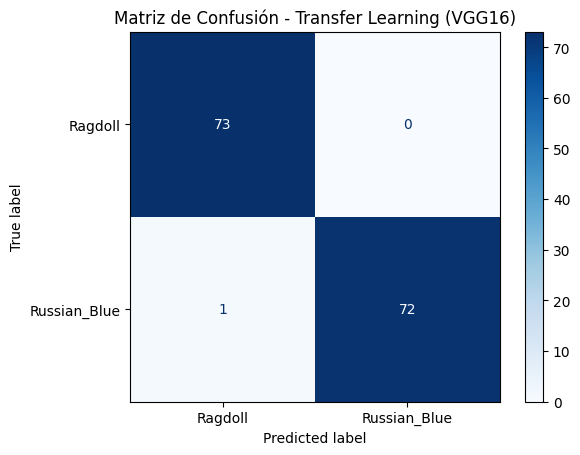

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Cargar la base de datos de imágenes utilizando ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    images_path+'/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    images_path+'/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Cargar el modelo base (VGG16) preentrenado en ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Construir el modelo completo agregando capas densas adicionales
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 clases: Ragdoll y Russian Blue

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    verbose=1
)

# Evaluar el modelo
test_generator.reset()  # Reiniciar el generador para asegurar la correcta predicción
y_pred_categorical = model.predict(test_generator)
y_pred = np.argmax(y_pred_categorical, axis=1)

# Obtener etiquetas verdaderas
y_true = test_generator.classes

# Calcular la precisión
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Reporte de clasificación
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Transfer Learning (VGG16)")
plt.show()

## Autoencoders

Los autoencoders son un tipo de red neuronal no supervisada utilizada para aprender representaciones eficientes de los datos, generalmente con el propósito de reducción de dimensionalidad o extracción de características.

Están compuestos por dos partes: el codificador encargado de reducir la dimensionalidad de los datos y el decodificador cuyo propósito es reconstruir los datos originales a partir de esta representación comprimida.

Se utilizará la biblioteca Keras para construir y entrenar un autoencoder, mediante los siguientes pasos:
* Definir las dimensiones de entrada: especificar la dimensión de entrada y la dimensión de codificación.
* Construir el modelo del autoencoder: crear el modelo de autoencoder compuesto por el codificador y el decodificador.
* Compilar el autoencoder: configurar el modelo con el optimizador Adam y la función de pérdida binary_crossentropy.
* Entrenar el autoencoder: entrenar el autoencoder con los datos de entrenamiento, utilizando un subconjunto de los datos reservado para validación.
* Obtener las representaciones codificadas: emplear el codificador para obtener las características codificadas de los datos de entrenamiento y prueba.
* Entrenar un clasificador: finalmente entrenar un clasificador utilizando las características codificadas.

Epoch 1/50
2/2 [==============================] - 1s 176ms/step - loss: 0.6969 - val_loss: 0.6907
Epoch 2/50
2/2 [==============================] - 0s 38ms/step - loss: 0.6901 - val_loss: 0.6854
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6847 - val_loss: 0.6795
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6786 - val_loss: 0.6729
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6719 - val_loss: 0.6667
Epoch 6/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6656 - val_loss: 0.6612
Epoch 7/50
2/2 [==============================] - 0s 45ms/step - loss: 0.6601 - val_loss: 0.6563
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6551 - val_loss: 0.6518
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6507 - val_loss: 0.6481
Epoch 10/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6470 - val_loss: 0.6450
Epoch 11/50
2/2 [===========

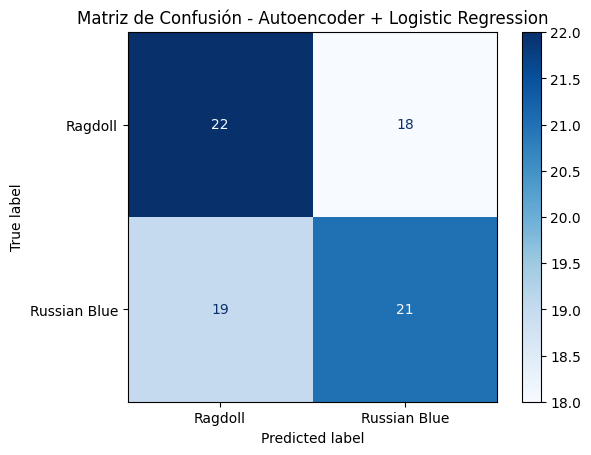

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Definir las dimensiones de entrada
input_dim = X_train.shape[1]
encoding_dim = 64  # Dimensión de codificación

# Definir el modelo del autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Definir los modelos
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# Compilar el autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Obtener las representaciones codificadas
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Entrenar un clasificador con las características codificadas
from sklearn.linear_model import LogisticRegression

# Definir el clasificador
classifier = LogisticRegression()

# Entrenar el clasificador
classifier.fit(X_train_encoded, y_train)

# Predecir en el conjunto de prueba
y_pred = classifier.predict(X_test_encoded)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['Ragdoll', 'Russian Blue']))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ragdoll', 'Russian Blue'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Autoencoder + Logistic Regression")
plt.show()

# Conclusión

A lo largo de este notebook se han llevado a cabo todas las etapas necesarias para la construcción de un modelo clasificador de IA con la capacidad de distinguir entre las razas de gato Ragdoll y Russian Blue en las imágenes que recibe.

En primer lugar, mediante la ingesta fue posible disponibilizar las muestras de datos de las razas de interés del conjunto de imágenes Oxford-IIIT Pet Dataset en el entorno de ejecución del notebook.

Seguidamente se aplicaron técnicas técnicas de procesamiento de imágenes como la definición de un tamaño común para estandarizar las muestras y la conversión de color a blanco y negro para reducir la cantidad de información, acompañadas de la extracción de características hog de cara a obtener la información más relevante de las fotografías, de modo que los datos se encontrasen en las mejores condiciones para ser evaluado por los algoritmos de inteligencia artificial.

Con los datos preprocesados se alcanzó la etapa de entrenamiento de modelos, en la cual se aplicaron algoritmos pertenecientes a diversos campos del aprendizaje automático, para todos ellos se aplicaron las mismas técnicas de evaluación (Accuracy, F1 Score, Precission, Recall y matriz de confusión) con el propósito de verificar su capacidad de generalización ante distintas muestras y se mostraron los resultados promedios obtenidos en dichas pruebas.

Por último, solo queda reflejar en estas conclusiones la evaluación del rendimiento obtenido en los distintos algoritmos ordenados de peor a mejor, en base a la puntuación que han obtenido en la métrica F1 Score, por tener usualmente un valor cercano al de accuracy y ofrecer un equilibrio entre las métricas precision y recall:

1. KNeighbors (0.12): la razón de tener un rendimiento tan extremadamente malo puede encontrarse en que esta técnica presenta dificultades a la hora de entrenarse con datos de alta dimensión como las características HOG, ya que la "maldición de la dimensionalidad" afecta su rendimiento.

2. Autoencoders (0.54): este rendimiento tan pésimo puede deberse a que, a pesar de que se pueden usar en tareas de clasificación, no están diseñados principalmente para ello, sino para reducción de dimensionalidad y aprendizaje de representaciones.

3. DecisionTree (0.56): este valor tan bajo puede ser debido a que esta técnica tiende a sobreajustarse a los datos de entrenamiento, lo cual hace que pueda ser ineficiente al generalizar a datos no vistos.

4. Random Forest (0.64): los bosques aleatorios son una combinación de múltiples árboles de decisión, inevitablemente esto conduce a una mejora respecto al punto anterior, sin embargo pueden seguir siendo poco eficientes debido a que se trata de un problema con datos de alta dimensión.

5. Logistic Regression (0.68): esta técnica es realmente efectiva cuando las clases son linealmente separables, pero en problemas más complejos como la clasificación de razas de gatos basada en imágenes, su capacidad puede ser limitada, dando como resultado una puntuación ligeramente mediocre.

6. SVM Linear (0.71): al igual que la técnica anterior, este algoritmo es efectivo para la clasificación cuando las clases son linealmente separables en el espacio de características, por lo que tiene sentido que haya obtenido una puntuación similar, sin embargo puede tener una ligera mejora del rendimiento debido a que se trata de una técnica más compleja a nivel computacional.

6. SVM RBF (0.71): los SVM con kernel RBF pueden capturar relaciones no lineales en los datos, sin embargo que haya obtenido una puntuación similar al anterior, especializado en capturar relaciones lineales, indica que esto no es un aspecto de gran importancia.

7. Red neuronal (0.73): esta técnica ha obtenido un rendimiento más aceptable por su capaces de modelar relaciones complejas, con un mayor tiempo entrenamiento y variando su arquitectura sería posible que obtuviese un aún mejor rendimiento.

8. Bagging con Árboles de Decisión (0.75): esta técnica mejora el rendimiento respecto a DecisionTree y Random Forest debido a que facilita la reducción de la varianza, permitiendo una mejor generalización.

9. Gradient Boosting con XGBoost (0.79): esta técnica de boosting supone una mejora respecto a la anterior debido a su modo de combinar múltiples árboles de decisión de manera secuencial para corregir los errores de los anteriores, gracias a esta particular forma de utilizar los árboles de decisión puede lograr una mayor precisión y capacidad de generalización.

10. Transfer Learning con CNN preentrenadas (0.99): es lógico que esta técnica haya obtenido el mejor rendimiento de todas, logrando una puntuación casi excelente, debido a que utiliza una red neuronal convolucional preentrenada con grandes conjuntos de datos de imágenes (como ImageNet) logrando aprender representaciones sobresalientes.

Como conclusión final para este proyecto se puede afirmar los algoritmos tradicionales y los modelos más simples no pueden competir con la capacidad de las CNN y técncias de Transfer Learning para capturar la complejidad de los datos visuales, especialmente si hablamos de modelos preentrenados que han aprendido características muy representativas de las imágenes a partir de grandes volúmenes de datos.





